In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# df = pd.read_csv('Cleaned_KL_Housing_Dataset.csv')

In [ ]:
# # Separate features and target variable
# X = df.drop('Price', axis=1)
# y = df['Price']

In [ ]:
# # One-hot encode categorical features
# X = pd.get_dummies(X)

In [ ]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Create and train the model
# lr_clf = RandomForestRegressor()
# lr_clf.fit(X_train, y_train)

In [ ]:
# score = lr_clf.score(X_test, y_test)
# print(f'Model Score: {score}')

In [ ]:

# # Load the dataset
# data = {
#     'Location': ['Bukit Bintang'],
#     'Rooms': [5],
#     'Bathrooms': [5],
#     'Car Parks': [2],
#     'Property Type': ['Serviced Residence'],
#     'Furnishing': ['Partly Furnished'],
#     'Build Type': ['Built-up'],
#     'Sqft': [4157]
# }
# new_data = pd.DataFrame(data)

# # One-hot encode categorical features
# new_data = pd.get_dummies(new_data)

# # Load the training dataset to get the feature names
# df = pd.read_csv('Cleaned_KL_Housing_Dataset.csv')
# X_train = pd.get_dummies(df.drop('Price', axis=1))

# # Align the columns of the prediction dataset with the columns of the training dataset
# new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# # Make predictions
# predicted_prices = lr_clf.predict(new_data)

# print("Predicted Price:", predicted_prices[0])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv('Cleaned_KL_Housing_Dataset.csv')

# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# One-hot encode categorical features (if any)
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = best_rf.score(X_test, y_test)

print(f'Model Score: {score}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'best_rf_model.pkl')


In [ ]:
import joblib

# Load the trained model
best_rf_model = joblib.load('best_rf_model.pkl')

# New data for prediction (example user input)
data = {
    'Location': ['KLCC'],
    'Rooms': [4],
    'Bathrooms': [4],
    'Car Parks': [2],
    'Property Type': ['Serviced Residence'],
    'Furnishing': ['Fully Furnished'],
    'Build Type': ['Built-up'],
    'Sqft': [1378]
}
new_data = pd.DataFrame(data)

# One-hot encode categorical features
new_data = pd.get_dummies(new_data)

# Ensure the new data has the same columns as the training data
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X.columns]

# Make predictions
predicted_prices = best_rf_model.predict(new_data)

print("Predicted Price:", predicted_prices[0])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = best_rf.score(X_test, y_test)

print(f'Model Score: {score}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np


train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = (-train_scores).mean(axis=1)
test_scores_mean = (-test_scores).mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.legend()
plt.title('Learning Curves')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# import joblib

# # Load dataset
# df = pd.read_csv('Cleaned_KL_Housing_Dataset.csv')

# # Separate features and target variable
# X = df.drop('Price', axis=1)
# y = df['Price']

# # Define preprocessing for categorical features
# categorical_features = X.select_dtypes(include=['object']).columns
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Create preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_features)
#     ],
#     remainder='passthrough'
# )

# # Define the model pipeline
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor())
# ])

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model_pipeline.fit(X_train, y_train)

# # Save the model pipeline
# joblib.dump(model_pipeline, 'prediction_model.pkl')


In [ ]:
# import joblib
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Load the saved model pipeline
# loaded_model_pipeline = joblib.load('prediction_model.pkl')

# # Use the model to make predictions
# y_pred = loaded_model_pipeline.predict(X_test)

# # Evaluate the model performance
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")


In [ ]:
# import pandas as pd
# import joblib

# # Load the trained model
# model_pipeline = joblib.load('prediction_model.pkl')

# # New data for prediction
# data = {
#     'Location': ['KLCC'],
#     'Rooms': [3],
#     'Bathrooms': [3],
#     'Car Parks': [2],
#     'Property Type': ['Serviced Residence'],
#     'Furnishing': ['Fully Furnished'],
#     'Build Type': ['Built-up'],
#     'Sqft': [1330]
# }
# new_data = pd.DataFrame(data)

# # Make predictions
# predicted_prices = model_pipeline.predict(new_data)

# print("Predicted Price:", predicted_prices[0])


In [ ]:
#FINAL MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib


# Load dataset
df = pd.read_csv('Cleaned_KL_Housing_Dataset.csv')

# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Log transformation of the target variable to reduce skewness
y = np.log1p(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align the train and test data
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Feature engineering: Adding interaction terms or polynomial features (optional)
# Example: X_train['Sqft_Rooms'] = X_train['Sqft'] * X_train['Rooms']
# Example: X_test['Sqft_Rooms'] = X_test['Sqft'] * X_test['Rooms']

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_rf, 'best_rf_model.pkl')

# Evaluate the model
y_pred = best_rf.predict(X_test)

# Inverse the log transformation
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
score = best_rf.score(X_test, y_test)

print(f'Model Score: {score}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model
best_rf_model = joblib.load('best_rf_model.pkl')

# New data for prediction (example user input)
data = {
    'Location': ['KLCC'],
    'Rooms': [4],
    'Bathrooms': [3],
    'Car Parks': [2],
    'Property Type': ['Serviced Residence'],
    'Furnishing': ['Partly Furnished'],
    'Build Type': ['Built-up'],
    'Sqft': [2066]
}
new_data = pd.DataFrame(data)

# One-hot encode categorical features
new_data = pd.get_dummies(new_data)

# Ensure the unseen data has the same columns as the training data
missing_cols_unseen = set(best_rf.feature_names_in_) - set(unseen_df.columns)
for col in missing_cols_unseen:
    unseen_df[col] = 0
unseen_df = unseen_df[best_rf.feature_names_in_]

# Make predictions on unseen data
unseen_pred_log = best_rf.predict(unseen_df)
unseen_pred = np.expm1(unseen_pred_log)

print("Predicted Price for Unseen Data:", unseen_pred[0])


In [ ]:
# Verification of Model Accuracy on Training Data
train_pred = best_rf.predict(X_train)
train_pred_exp = np.expm1(train_pred)
y_train_exp = np.expm1(y_train)

train_mse = mean_squared_error(y_train_exp, train_pred_exp)
train_mae = mean_absolute_error(y_train_exp, train_pred_exp)
train_score = best_rf.score(X_train, y_train)

print(f'Training Data Model Score: {train_score}')
print(f'Training Data Mean Squared Error: {train_mse}')
print(f'Training Data Mean Absolute Error: {train_mae}')

# Testing on Unseen Data
unseen_data = {
    'Location': ['KLCC'],
    'Rooms': [4],
    'Bathrooms': [4],
    'Car Parks': [2],
    'Property Type': ['Serviced Residence'],
    'Furnishing': ['Fully Furnished'],
    'Build Type': ['Built-up'],
    'Sqft': [1378]
}
unseen_df = pd.DataFrame(unseen_data)

# One-hot encode categorical features
unseen_df = pd.get_dummies(unseen_df)

# Ensure the unseen data has the same columns as the training data
missing_cols_unseen = set(best_rf_model.feature_names_in_) - set(unseen_df.columns)
for col in missing_cols_unseen:
    unseen_df[col] = 0
unseen_df = unseen_df[best_rf_model.feature_names_in_]

# Make predictions on unseen data
unseen_pred_log = best_rf_model.predict(unseen_df)
unseen_pred = np.expm1(unseen_pred_log)

print("Predicted Price for Unseen Data:", unseen_pred[0])


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import numpy as np

# Load dataset
df = pd.read_csv('Cleaned_KL_Housing_Dataset.csv')

# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Log transformation of the target variable to reduce skewness
y = np.log1p(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align the train and test data
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Feature engineering: Adding interaction terms or polynomial features (optional)
# Example: X_train['Sqft_Rooms'] = X_train['Sqft'] * X_train['Rooms']
# Example: X_test['Sqft_Rooms'] = X_test['Sqft'] * X_test['Rooms']

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_rf, 'best_rf_model.pkl')

# Evaluate the model
y_pred = best_rf.predict(X_test)

# Inverse the log transformation
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
score = best_rf.score(X_test, y_test)

print(f'Model Score: {score}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
365 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", l

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Model Score: 0.9070296540338275
Mean Squared Error: 0.17376618115820733
Mean Absolute Error: 0.19191284347335025


In [2]:
# Verification of Model Accuracy on Training Data
train_pred = best_rf.predict(X_train)
train_pred_exp = np.expm1(train_pred)
y_train_exp = np.expm1(y_train)

train_mse = mean_squared_error(y_train_exp, train_pred_exp)
train_mae = mean_absolute_error(y_train_exp, train_pred_exp)
train_score = best_rf.score(X_train, y_train)

print(f'Training Data Model Score: {train_score}')
print(f'Training Data Mean Squared Error: {train_mse}')
print(f'Training Data Mean Absolute Error: {train_mae}')

# Testing on Unseen Data
unseen_data = {
    'Location': ['KLCC'],
    'Rooms': [4],
    'Bathrooms': [4],
    'Car Parks': [2],
    'Property Type': ['Serviced Residence'],
    'Furnishing': ['Fully Furnished'],
    'Build Type': ['Built-up'],
    'Sqft': [1378]
}
unseen_df = pd.DataFrame(unseen_data)

# One-hot encode categorical features
unseen_df = pd.get_dummies(unseen_df)

# Ensure the unseen data has the same columns as the training data
missing_cols_unseen = set(best_rf.feature_names_in_) - set(unseen_df.columns)
for col in missing_cols_unseen:
    unseen_df[col] = 0
unseen_df = unseen_df[best_rf.feature_names_in_]

# Make predictions on unseen data
unseen_pred_log = best_rf.predict(unseen_df)
unseen_pred = np.expm1(unseen_pred_log)

print("Predicted Price for Unseen Data:", unseen_pred[0])


Training Data Model Score: 0.9840344521583202
Training Data Mean Squared Error: 0.035147620900322384
Training Data Mean Absolute Error: 0.0892933631096555


C:\Users\Acer\AppData\Local\Temp\ipykernel_15796\633473956.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unseen_df[col] = 0
C:\Users\Acer\AppData\Local\Temp\ipykernel_15796\633473956.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unseen_df[col] = 0
C:\Users\Acer\AppData\Local\Temp\ipykernel_15796\633473956.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Predicted Price for Unseen Data: 1.308807384285867


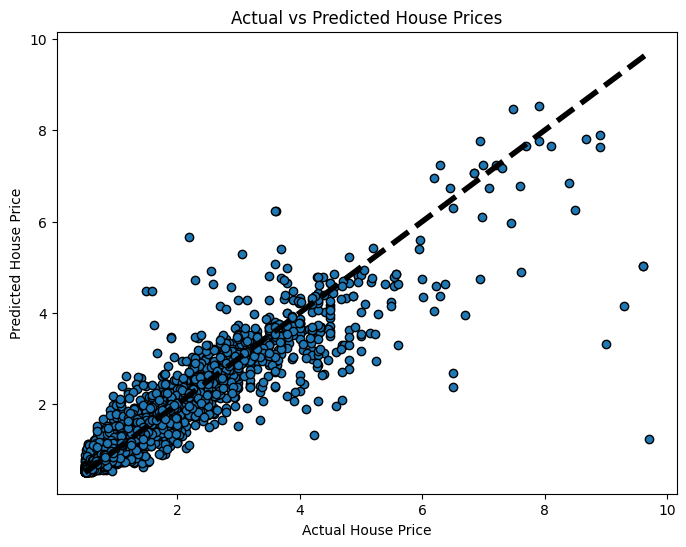

In [7]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(y_true, y_pred, title=''):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    plt.xlabel('Actual House Price')
    plt.ylabel('Predicted House Price')
    plt.title(title)
    plt.show()

# Plot for the test set
plot_actual_vs_predicted(y_test_exp, y_pred_exp, title='Actual vs Predicted House Prices')
